# Motorcycle Price Evaluation using eBay Listings
This notebook helps determine whether a given motorcycle listing is priced fairly based on historical eBay sales data. We'll build a predictive model and compare any new listing against it.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('MotorcycleData.csv',encoding='cp1252')
df.head()

,Unnamed: 0,Condition,Condition_Desc,Price,Location,Model_Year,Mileage,Exterior_Color,Make,Warranty,...,Vehicle_Title,OBO,Feedback_Perc,Watch_Count,N_Reviews,Seller_Status,Vehicle_Tile,Auction,Buy_Now,Bid_Count
0,0,Used,mint!!! very low miles,"$11,412","McHenry, Illinois, United States",2013.0,"16,000",Black,Harley-Davidson,Unspecified,...,NaN,False,8.1,NaN,2427,Private Seller,Clear,True,False,28.0
1,1,Used,Perfect condition,"$17,200","Fort Recovery, Ohio, United States",2016.0,60,Black,Harley-Davidson,Vehicle has an existing warranty,...,NaN,False,100,17,657,Private Seller,Clear,True,True,0.0
2,2,Used,NaN,"$3,872","Chicago, Illinois, United States",1970.0,"25,763",Silver/Blue,BMW,Vehicle does NOT have an existing warranty,...,NaN,False,100,NaN,136,NaN,Clear,True,False,26.0
3,3,Used,CLEAN TITLE READY TO RIDE HOME,"$6,575","Green Bay, Wisconsin, United States",2009.0,"33,142",Red,Harley-Davidson,NaN,...,NaN,False,100,NaN,2920,Dealer,Clear,True,False,11.0
4,4,Used,NaN,"$10,000","West Bend, Wisconsin, United States",2012.0,"17,800",Blue,Harley-Davidson,NO WARRANTY,...,NaN,False,100,13,271,OWNER,Clear,True,True,0.0


## Data Preprocessing
Handle missing values and encode categorical features.

In [ ]:
# Only look at the buy now bikes built after 1980 and relevant data columns
df = df[(df['Buy_Now'] == True) & (df['Model_Year'] >= 1980)]
df['Price'] = df['Price'].str.replace(r'[$,]', '', regex=True).str.strip().astype(float)
df['Mileage'] = df['Mileage'].str.replace(',', '').str.strip().astype(float)

sale_features = ['Condition', 'Price', 'Model_Year', 'Mileage', 'Exterior_Color', 'Make', 'N_Reviews']

df = df[sale_features].dropna(axis=0)

# Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

# Get dummies and split into X and y datasets
y = df['Price']
X = pd.get_dummies(df, columns=object_cols, drop_first=True).drop('Price', axis=1)

## Train-Test Split

In [4]:
# Select features and target
y = df['Price']
X = pd.get_dummies(df, columns=object_cols, drop_first=True).drop('Price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

In [5]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print('MAE:', mean_absolute_error(y_test, preds))
print('RMSE:', root_mean_squared_error(y_test, preds))
print('R^2 Score:', r2_score(y_test, preds))

MAE: 3769.504697199973
RMSE: 7138.659092758906
R^2 Score: 0.4838004346752851


## Visual Analysis

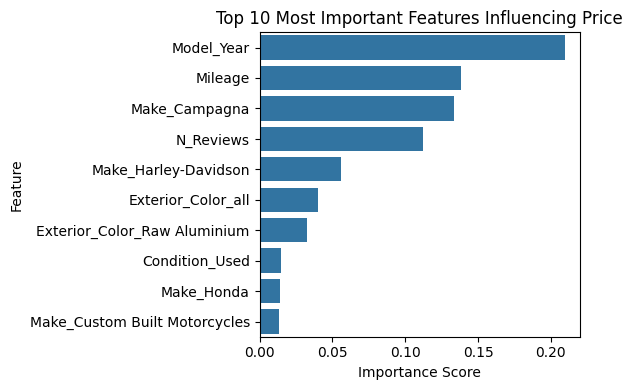

In [6]:
importances = model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6, 4))
sns.barplot(x=importances[indices][:10], y=feature_names[indices][:10])
plt.title('Top 10 Most Important Features Influencing Price')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

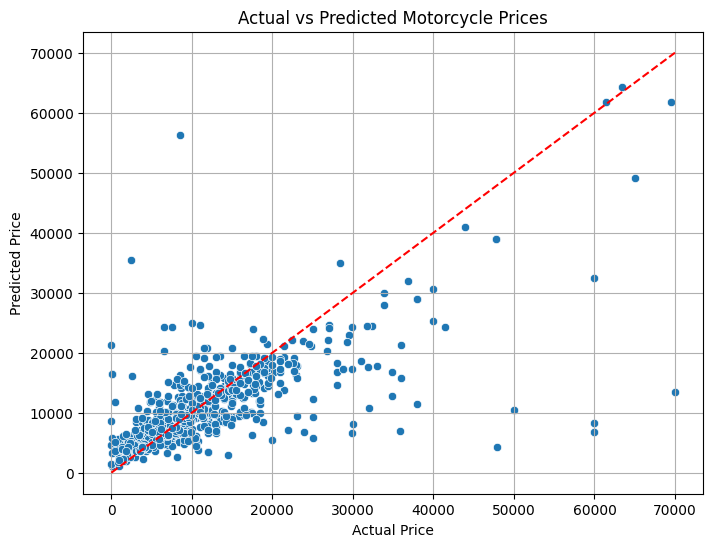

In [7]:
max_value = np.max([y_test,preds])

# Plot predicted vs actual prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=preds)
plt.plot([0,max_value],[0,max_value],'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Motorcycle Prices')
plt.grid(True)
plt.show()

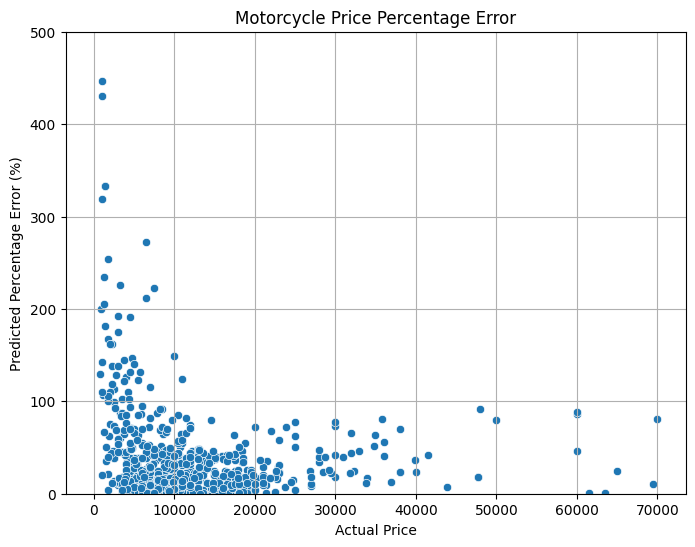

In [8]:
percentage_error = abs(y_test - preds) / abs(y_test) * 100

# Plot predicted vs actual prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=percentage_error)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Percentage Error (%)')
plt.ylim([0,500])
plt.title('Motorcycle Price Percentage Error')
plt.grid(True)
plt.show()